<img src="https://storage.googleapis.com/ultralytics/logo/logoname1000.png" width="150">

This notebook contains software developed by Ultralytics LLC, and **is freely available for redistribution under the GPL-3.0 license**. For more information please visit https://github.com/ultralytics/yolov3 and https://www.ultralytics.com.





In [39]:
import time
import glob
import torch
import os

from IPython.display import Image, clear_output
print('PyTorch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

PyTorch 1.1.0 _CudaDeviceProperties(name='Tesla K80', major=3, minor=7, total_memory=11441MB, multi_processor_count=13)


Clone repository and download COCO 2014 dataset (20GB):

In [0]:
!git clone https://github.com/ultralytics/yolov3  # clone
!bash yolov3/data/get_coco_dataset_gdrive.sh  # copy COCO2014 dataset (20GB)
%cd yolov3

Run `detect.py` to perform inference on images in `data/samples` folder:

Namespace(cfg='cfg/yolov3-spp.cfg', conf_thres=0.5, data='data/coco.data', fourcc='mp4v', images='data/samples', img_size=416, nms_thres=0.5, output='output', weights='weights/yolov3-spp.weights')
Using CUDA with Apex device0 _CudaDeviceProperties(name='Tesla K80', total_memory=11441MB)

image 1/2 data/samples/bus.jpg: 416x320 3 persons, 1 buss, 1 handbags, Done. (0.119s)
image 2/2 data/samples/zidane.jpg: 256x416 2 persons, 1 ties, Done. (0.085s)
Results saved to /content/yolov3/output


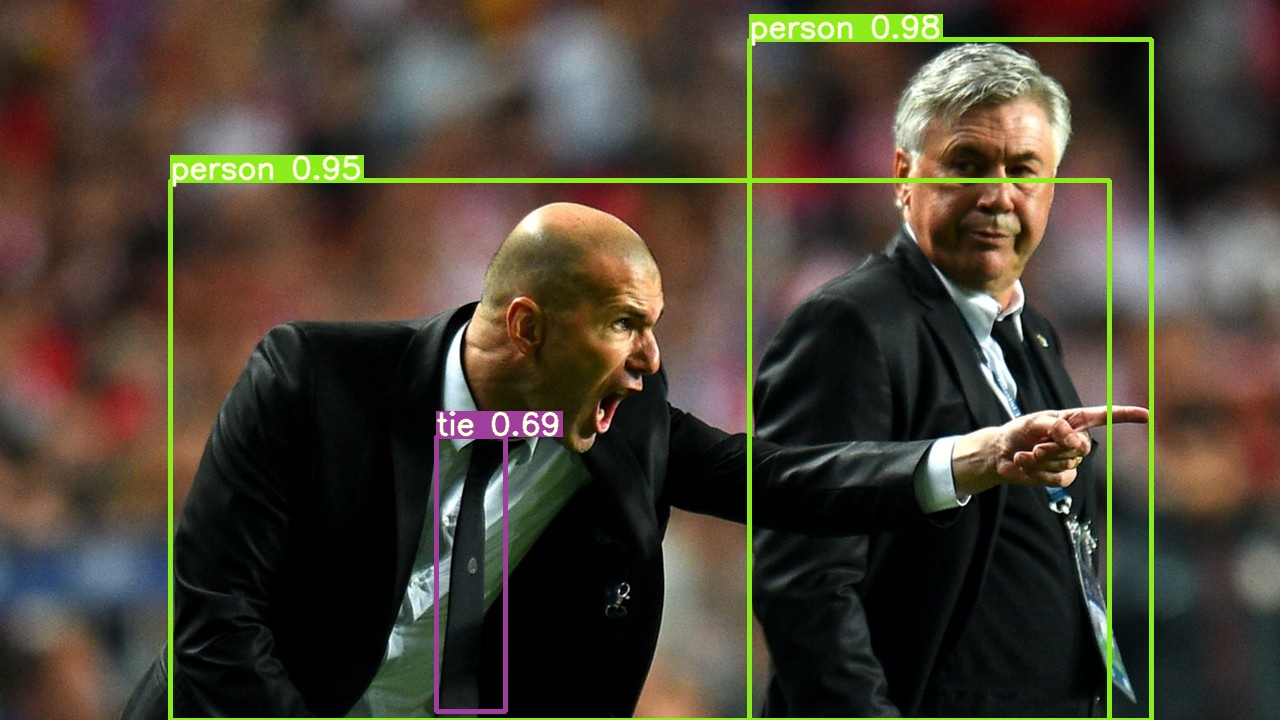

In [0]:
!python3 detect.py
Image(filename='output/zidane.jpg', width=600)

Run `train.py` to train YOLOv3-SPP starting from a darknet53 backbone:

In [0]:
!python3 train.py --data data/coco_64img.data --img-size 320 --epochs 3 --nosave

Run `test.py` to evaluate the performance of a trained darknet or PyTorch model:

In [0]:
!python3 test.py --data data/coco.data --save-json --img-size 416  # 0.565 mAP

Reproduce tutorial training runs and overlays results:

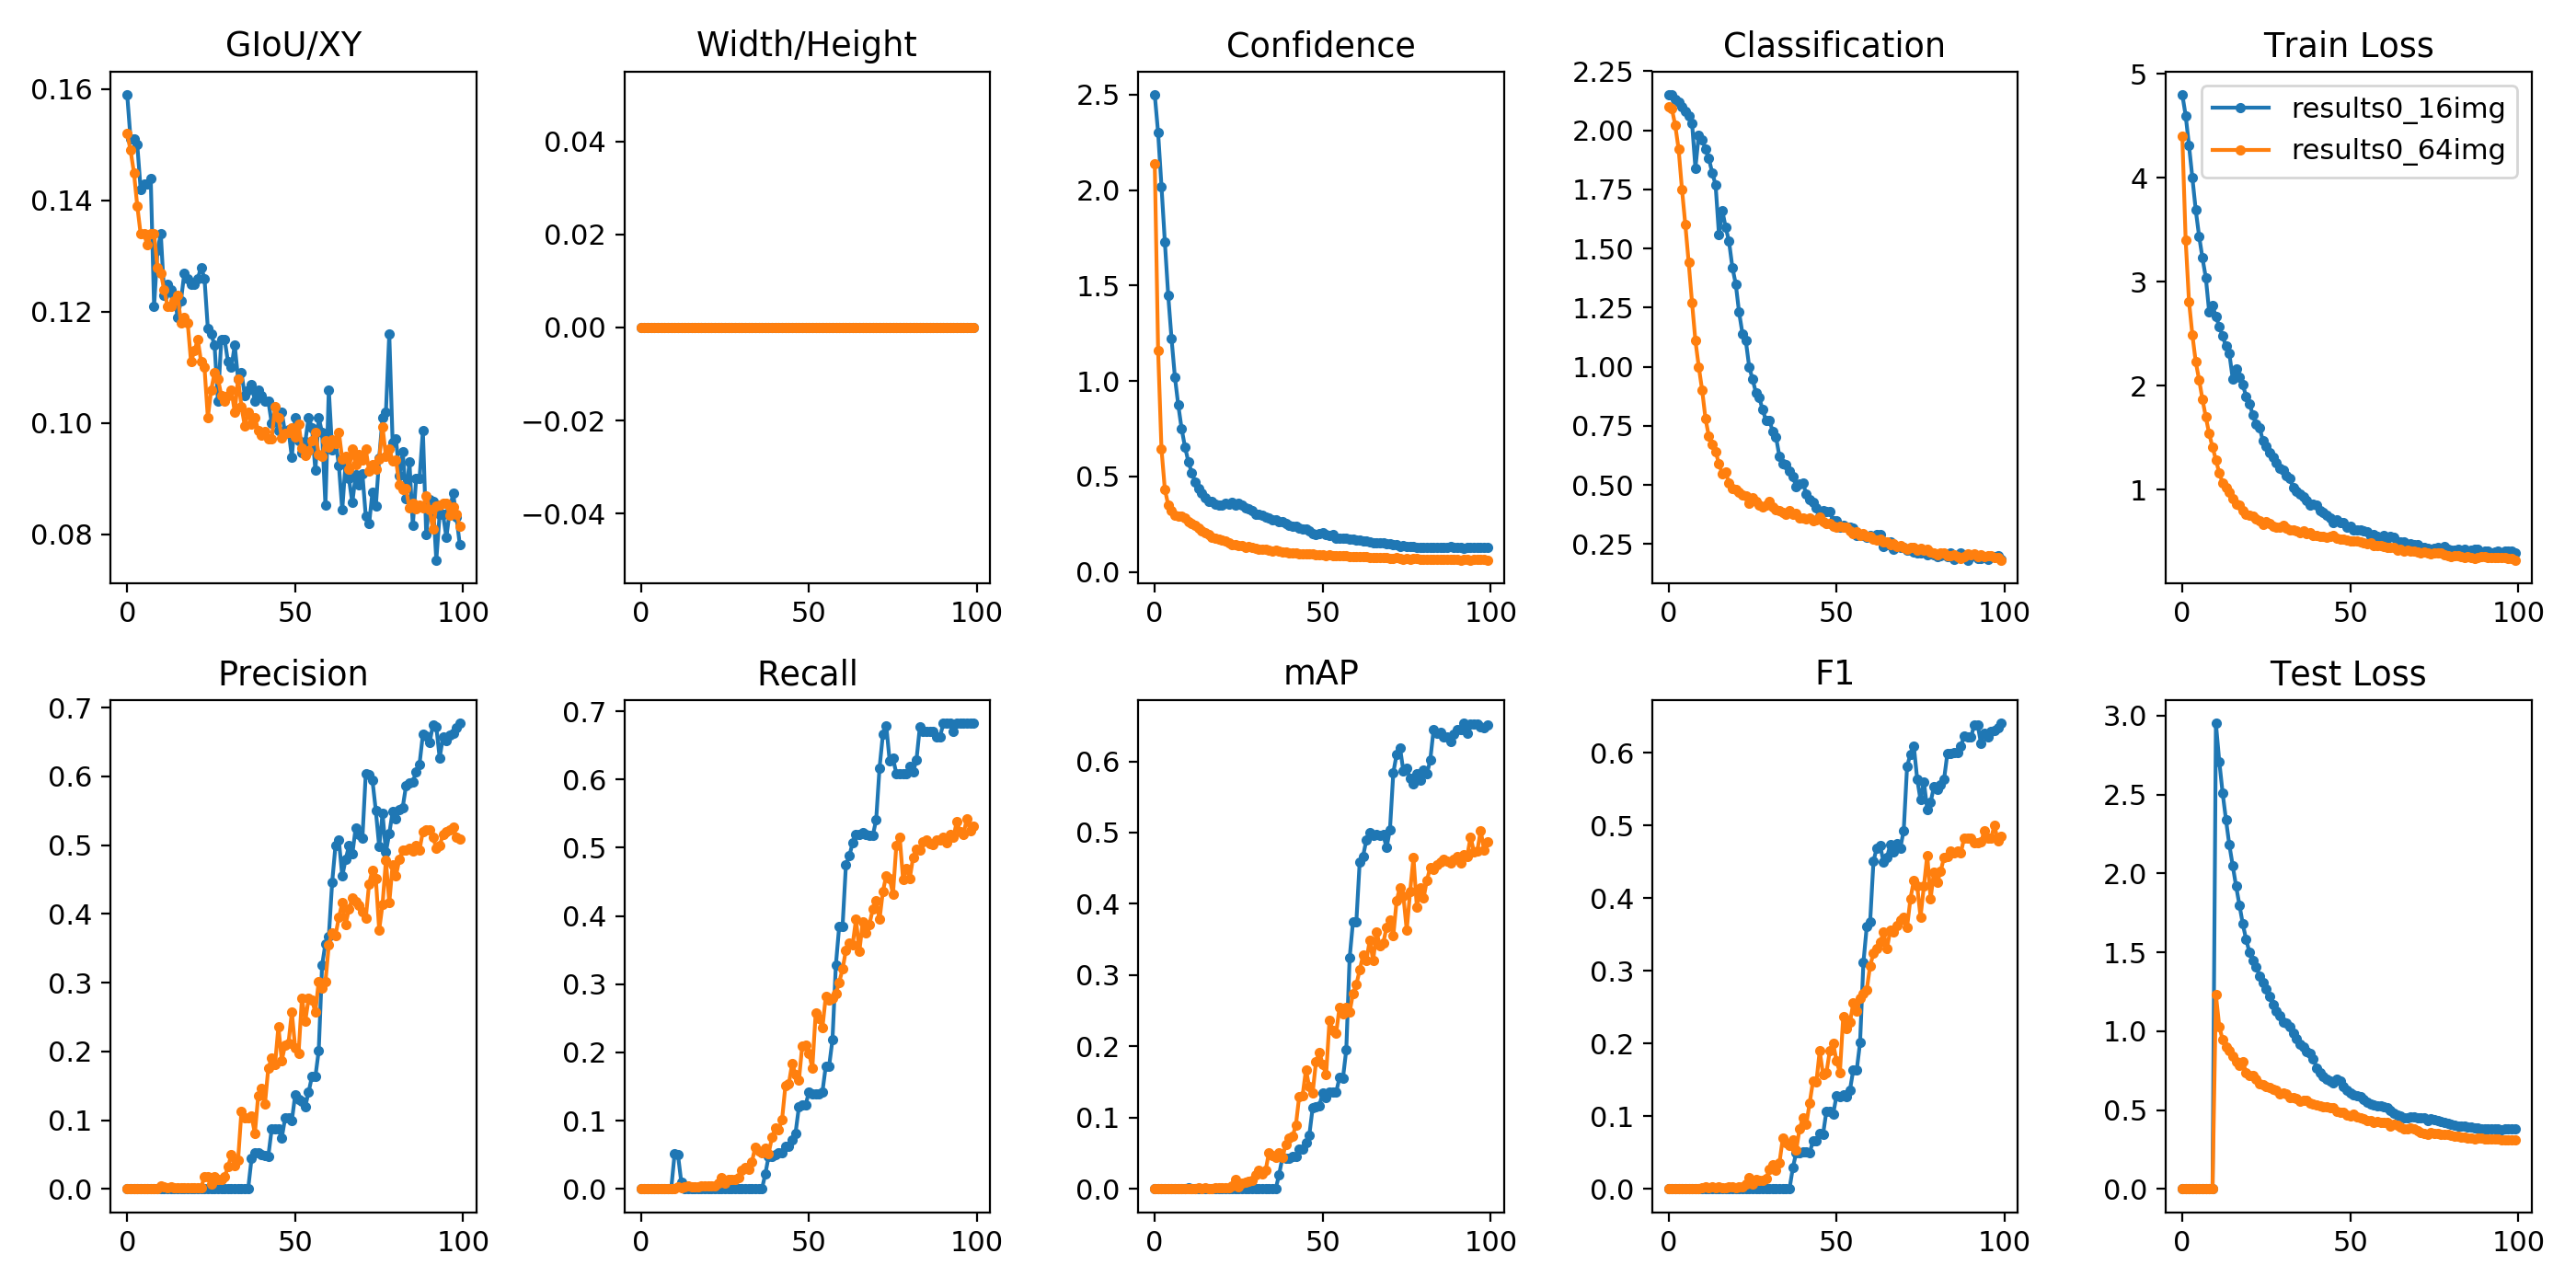

In [42]:
!python3 train.py --nosave --batch-size 4 --accumulate 1 --data data/coco_16img.data && mv results.txt results0_16img.txt
!python3 train.py --nosave --batch-size 4 --accumulate 1 --data data/coco_64img.data && mv results.txt results0_64img.txt
!python3 -c "from utils import utils; utils.plot_results()"  # plot training results
Image(filename='results.png', width=800)

Extras below

---




In [0]:
!git pull

In [0]:
%cd yolov3

In [0]:
!ls

In [0]:
# Unit Tests
!python3 detect.py  # detect 2 persons, 1 tie
!python3 test.py --data data/coco_32img.data  # test mAP = 0.8
!python3 train.py --data data/coco_32img.data --epochs 3 --nosave  # train 3 epochs

In [0]:
# Evolve Hyperparameters
!python3 train.py --data data/coco.data --img-size 320 --epochs 1 --evolve

In [0]:
# Plot Training Results
!python3 -c "from utils import utils; utils.plot_results()"